# Data import, exploration and formatting

In [230]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import os

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np 

In [231]:
df_census = pd.read_csv("FD_INDCVIZB_2019.csv", sep = ";", nrows = 10)
df_census

,CANTVILLE,NUMMI,ACHLR,AEMMR,AGED,AGER20,AGEREV,AGEREVQ,ANAI,ANEMR,...,TP,TRANS,TRIRIS,TYPC,TYPFC,TYPL,TYPMC,TYPMR,VOIT,WC
0,201,1,1,4,86,80,85,85,1931,8,...,Z,Z,ZZZZZZ,2,2,1,4,44,0,Z
1,201,1,1,4,88,80,87,85,1929,8,...,Z,Z,ZZZZZZ,2,2,1,4,44,0,Z
2,201,2,2,8,83,80,82,80,1936,4,...,Z,Z,ZZZZZZ,1,Z,1,1,12,0,Z
3,201,3,2,8,58,64,57,55,1958,4,...,Z,Z,ZZZZZZ,1,Z,1,1,12,1,Z
4,201,4,4,9,23,24,22,20,1997,1,...,Z,Z,ZZZZZZ,1,2,1,4,42,2,Z
5,201,4,4,9,23,24,22,20,1997,1,...,1,5,ZZZZZZ,1,2,1,4,42,2,Z
6,201,5,4,9,48,54,47,45,1971,3,...,1,5,ZZZZZZ,1,2,1,4,41,2,Z
7,201,5,4,9,18,17,17,15,2001,3,...,Z,Z,ZZZZZZ,1,2,1,4,41,2,Z
8,201,5,4,9,45,54,44,40,1974,3,...,1,5,ZZZZZZ,1,2,1,4,41,2,Z
9,201,5,4,9,14,14,13,10,2005,3,...,Z,Z,ZZZZZZ,1,2,1,4,41,2,Z


In [232]:
df_census.columns

Index(['CANTVILLE', 'NUMMI', 'ACHLR', 'AEMMR', 'AGED', 'AGER20', 'AGEREV',
       'AGEREVQ', 'ANAI', 'ANEMR', 'APAF', 'ARM', 'ASCEN', 'BAIN', 'BATI',
       'CATIRIS', 'CATL', 'CATPC', 'CHAU', 'CHFL', 'CHOS', 'CLIM', 'CMBL',
       'COUPLE', 'CS1', 'CUIS', 'DEPT', 'DEROU', 'DIPL', 'DNAI', 'EAU',
       'EGOUL', 'ELEC', 'EMPL', 'ETUD', 'GARL', 'HLML', 'ILETUD', 'ILT',
       'IMMI', 'INAI', 'INATC', 'INFAM', 'INPER', 'INPERF', 'IPONDI', 'IRAN',
       'IRIS', 'LIENF', 'LPRF', 'LPRM', 'METRODOM', 'MOCO', 'MODV', 'NA17',
       'NA5', 'NAIDT', 'NBPI', 'NE17FR', 'NE24FR', 'NE3FR', 'NE5FR', 'NENFR',
       'NPERR', 'NUMF', 'ORIDT', 'RECH', 'REGION', 'SANI', 'SANIDOM', 'SEXE',
       'SFM', 'STAT_CONJ', 'STATR', 'STOCD', 'SURF', 'TACT', 'TACTD16', 'TP',
       'TRANS', 'TRIRIS', 'TYPC', 'TYPFC', 'TYPL', 'TYPMC', 'TYPMR', 'VOIT',
       'WC'],
      dtype='object')

In [233]:
columns = {
    "IRIS": str,
    "IPONDI": float,
    "AGED": int,
    "CS1": int
}

df_census = pd.read_csv("FD_INDCVIZB_2019.csv", sep = ";", dtype = columns, usecols = columns.keys())
df_census.head()

,AGED,CS1,IPONDI,IRIS
0,86,7,5.044083,ZZZZZZZZZ
1,88,7,5.044083,ZZZZZZZZZ
2,83,7,5.000000,ZZZZZZZZZ
3,58,5,5.034054,ZZZZZZZZZ
4,23,5,5.021708,ZZZZZZZZZ


In [234]:
df_census = df_census.rename(columns = {
    "IRIS": "iris_id",
    "IPONDI": "weight",
    "AGED": "age",
    "CS1": "csp"
})

df_census.head()

,age,csp,weight,iris_id
0,86,7,5.044083,ZZZZZZZZZ
1,88,7,5.044083,ZZZZZZZZZ
2,83,7,5.000000,ZZZZZZZZZ
3,58,5,5.034054,ZZZZZZZZZ
4,23,5,5.021708,ZZZZZZZZZ


In [235]:
df_census["department_id"] = df_census["iris_id"].str[:2]
df_census["municipality_id"] = df_census["iris_id"].str[:5]

In [239]:
df_iris = gpd.read_file("CONTOURS-IRIS.shp")
df_iris.head()

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.500 7022290.500, 767647.200 7..."


In [240]:
df_iris.columns

Index(['INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS', 'TYP_IRIS',
       'geometry'],
      dtype='object')

In [241]:
df_iris = df_iris[["INSEE_COM","NOM_COM", "CODE_IRIS", "geometry"]].rename(columns = {
    "INSEE_COM": "municipality_id", "NOM_COM":"municipality_name", "CODE_IRIS": "iris_id"
})

In [242]:
df_iris

,municipality_id,municipality_name,iris_id,geometry
0,72191,Mayet,721910000,"POLYGON ((498083.500 6747517.400, 498128.000 6..."
1,77248,Lesches,772480000,"POLYGON ((685753.100 6868612.900, 685757.700 6..."
2,51426,Péas,514260000,"POLYGON ((759067.200 6849592.700, 758778.600 6..."
3,81199,Padiès,811990000,"POLYGON ((651482.800 6326359.400, 651475.600 6..."
4,59225,Feignies,592250102,"POLYGON ((767673.500 7022290.500, 767647.200 7..."
...,...,...,...,...
48584,71073,Chagny,710730102,"POLYGON ((831995.400 6646411.800, 831977.700 6..."
48585,38545,Vif,385450101,"POLYGON ((912429.500 6439712.700, 912342.600 6..."
48586,74063,Châtel,740630000,"POLYGON ((991081.900 6580596.800, 991205.600 6..."
48587,95101,Bray-et-Lû,951010000,"POLYGON ((603615.500 6895980.900, 603612.300 6..."


In [244]:
df_municipalities = df_iris.dissolve("municipality_id").reset_index()
df_municipalities

,municipality_id,geometry,municipality_name,iris_id
0,01001,"POLYGON ((851129.600 6563369.200, 851107.500 6...",L'Abergement-Clémenciat,010010000
1,01002,"POLYGON ((889113.200 6549307.800, 889111.600 6...",L'Abergement-de-Varey,010020000
2,01004,"POLYGON ((882936.400 6541364.300, 882932.900 6...",Ambérieu-en-Bugey,010040102
3,01005,"POLYGON ((846758.000 6544007.000, 846755.000 6...",Ambérieux-en-Dombes,010050000
4,01006,"POLYGON ((900682.500 6518954.000, 900466.600 6...",Ambléon,010060000
...,...,...,...,...
34873,95676,"POLYGON ((608000.000 6886602.000, 607973.100 6...",Villers-en-Arthies,956760000
34874,95678,"POLYGON ((645264.100 6888152.200, 645279.800 6...",Villiers-Adam,956780000
34875,95680,"POLYGON ((656141.900 6877322.900, 656091.200 6...",Villiers-le-Bel,956800111
34876,95682,"POLYGON ((656543.000 6887123.500, 656421.900 6...",Villiers-le-Sec,956820000


# 1.1) Study area

<Axes: >

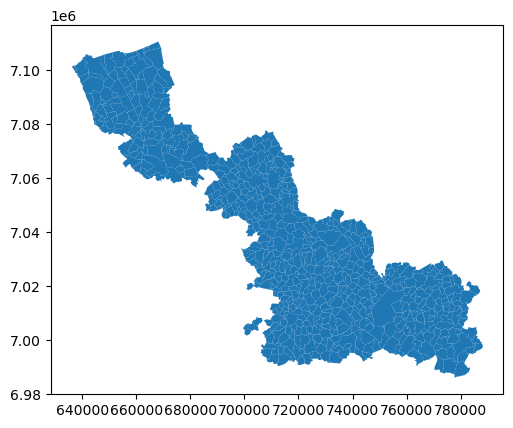

In [245]:
# Our first focus in the region Haut de france with the department id = 59
df_municipalities[df_municipalities["municipality_id"].str.startswith("59")].plot()

In [246]:
# We filter the municipalities that have more than 10 000 inhabitants in the department 59

df_inhabitants = df_census.groupby("municipality_id")["weight"].sum().reset_index(name = "inhabitants")

df_inhabitants1=df_inhabitants[df_inhabitants['inhabitants']>10000]
df_complet=pd.merge(df_municipalities[df_municipalities["municipality_id"].str.startswith("59")], df_inhabitants1)
print(df_complet)

   municipality_id                                           geometry  \
0            59008  POLYGON ((719043.600 7025016.700, 718955.600 7...   
1            59009  POLYGON ((709229.200 7056766.900, 709185.900 7...   
2            59011  POLYGON ((695992.200 7048320.600, 696071.800 7...   
3            59014  POLYGON ((735386.900 7029854.300, 735340.200 7...   
4            59017  POLYGON ((692103.000 7064705.500, 692077.500 7...   
5            59043  POLYGON ((680167.400 7065995.200, 680088.600 7...   
6            59112  POLYGON ((737911.500 7031917.200, 737913.000 7...   
7            59122  POLYGON ((717356.400 7005693.000, 716677.900 7...   
8            59139  POLYGON ((732273.600 7001096.500, 732214.250 7...   
9            59152  POLYGON ((703042.300 7073295.000, 703088.300 7...   
10           59155  POLYGON ((657805.650 7101451.500, 657571.100 7...   
11           59163  POLYGON ((711428.000 7062319.200, 711355.500 7...   
12           59172  POLYGON ((728123.400 7024262.10

<Axes: >

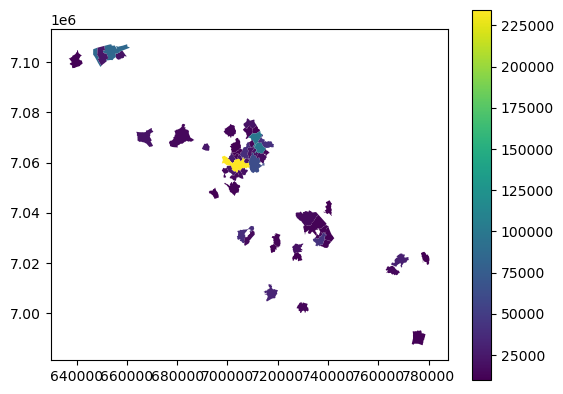

In [247]:
# We plot the results in a map
df_complet.plot("inhabitants", legend = True)

In [249]:
min_value = df_complet['inhabitants'].min()
max_value = df_complet['inhabitants'].max()

print("Minimum value of column 'column_name':", min_value)
print("Maximum value of column 'column_name':", max_value)

Minimum value of column 'column_name': 10086.000017639006
Maximum value of column 'column_name': 234451.9397214


<Axes: >

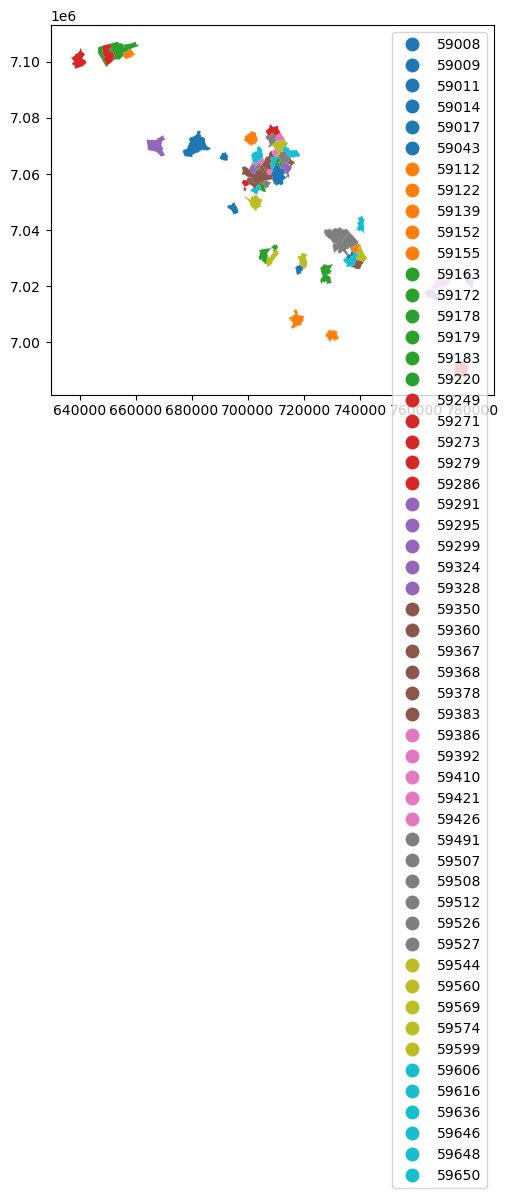

In [250]:
# In order to select the center municipality and its neighbouring municipalities, we plot the filtered municipalities and their IDs 

df_complet.plot("municipality_id", legend = True)

### We select the center municipality to be Lille (id: 59350)

In [252]:
# The center municipality is the most populated area of the department 59, representing Haut de France region.
# It has a total inhabitants of approximately 234 450. 
# It has multiple neighbouring municipalities having more than 10 000 inhabitants.
df_complet[df_complet['municipality_id'] == '59350']

,municipality_id,geometry,municipality_name,iris_id,inhabitants
27,59350,"POLYGON ((702949.300 7056391.300, 702916.600 7...",Lille,593500408,234451.939721


<Axes: >

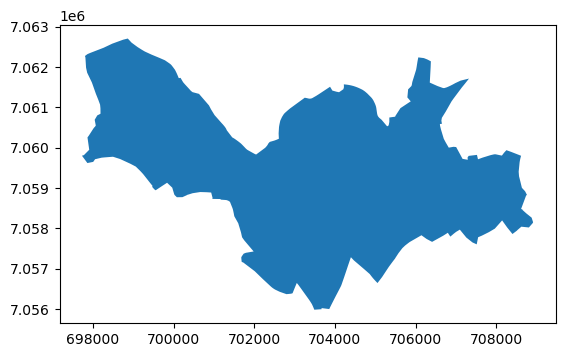

In [253]:
#map of the center municipality
df_complet[df_complet['municipality_id'] == '59350'].plot()

In [254]:
#We select the neighbouring area
#59360:Le Cateau-Cambrésis
#59378:Marcq-en-Barœul

chosen_muni=['59350','59360','59368','59378','59527','59507','59220','59410','59009','59328']

<Axes: >

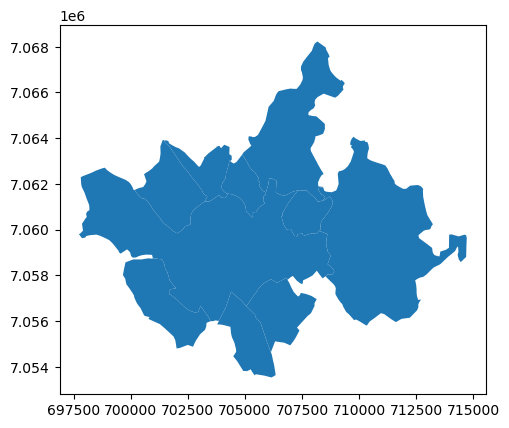

In [255]:
#Map the study area: Center municipality and its neighbouring municipalities
df_complet[df_complet['municipality_id'].isin(chosen_muni)].plot()

# 1.2) Territorial analysis

In [272]:
# The list of the municipalities included in the study area, along with their corresponding weighted population count
study_area = df_complet[df_complet['municipality_id'].isin(chosen_muni)]
study_area

,municipality_id,geometry,municipality_name,iris_id,inhabitants
1,59009,"POLYGON ((709229.200 7056766.900, 709185.900 7...",Villeneuve-d'Ascq,590090207,61944.062013
16,59220,"POLYGON ((705852.200 7053600.700, 705472.800 7...",Faches-Thumesnil,592200204,18191.000000
26,59328,"POLYGON ((701552.200 7060192.900, 701517.200 7...",Lambersart,593280501,27404.999753
27,59350,"POLYGON ((702949.300 7056391.300, 702916.600 7...",Lille,593500408,234451.939721
28,59360,"POLYGON ((700628.000 7056213.100, 700607.000 7...",Loos,593600201,22877.000142
30,59368,"POLYGON ((705349.000 7060638.800, 705332.300 7...",La Madeleine,593680302,21855.522048
31,59378,"POLYGON ((706335.700 7062164.400, 706292.200 7...",Marcq-en-Barœul,593780101,38489.000276
35,59410,"POLYGON ((707578.200 7059723.800, 707546.900 7...",Mons-en-Barœul,594100402,21272.066046
39,59507,"POLYGON ((706145.500 7054651.500, 706135.000 7...",Ronchin,595070202,19297.262521
43,59527,"POLYGON ((703282.100 7061486.200, 703280.200 7...",Saint-André-lez-Lille,595270105,13139.999646


<Axes: >

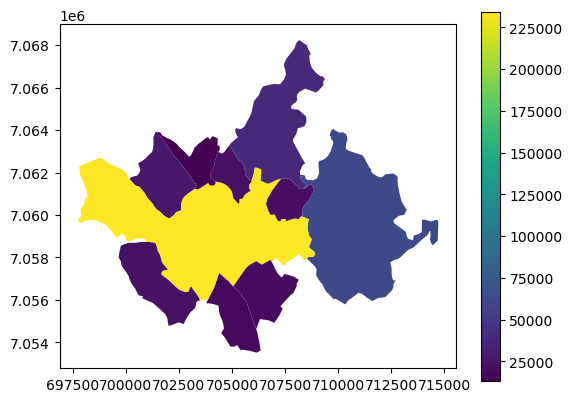

In [273]:
#Show study area population in a map
study_area.plot("inhabitants", legend = True)

In [276]:
df_census_filtered = df_census[df_census["municipality_id"].isin(chosen_muni)]
df_census_filtered

,age,csp,weight,iris_id,department_id,municipality_id
1884324,45,5,2.654907,592200204,59,59220
1884325,13,8,2.654907,592200204,59,59220
1884326,41,4,2.654907,592200204,59,59220
1884327,11,8,2.654907,592200204,59,59220
1884329,57,6,2.939367,592200101,59,59220
...,...,...,...,...,...,...
2352647,20,8,0.999999,593502801,59,59350
2352648,1,8,0.999999,593502801,59,59350
2352649,20,8,0.999999,593502801,59,59350
2352650,34,8,0.999999,593502802,59,59350


In [277]:
# Find the number of data points in the census dataset, corresponding to each municipality in the study area

counts = df_census_filtered.groupby('municipality_id').size()
counts = counts.reset_index()

counts.columns = ['municipality_id', 'census_sample_data_count']

study_area = study_area.merge(counts, on='municipality_id', how='left')
study_area

,municipality_id,geometry,municipality_name,iris_id,inhabitants,census_sample_data_count
0,59009,"POLYGON ((709229.200 7056766.900, 709185.900 7...",Villeneuve-d'Ascq,590090207,61944.062013,22138
1,59220,"POLYGON ((705852.200 7053600.700, 705472.800 7...",Faches-Thumesnil,592200204,18191.000000,6660
2,59328,"POLYGON ((701552.200 7060192.900, 701517.200 7...",Lambersart,593280501,27404.999753,10472
3,59350,"POLYGON ((702949.300 7056391.300, 702916.600 7...",Lille,593500408,234451.939721,86300
4,59360,"POLYGON ((700628.000 7056213.100, 700607.000 7...",Loos,593600201,22877.000142,8088
5,59368,"POLYGON ((705349.000 7060638.800, 705332.300 7...",La Madeleine,593680302,21855.522048,7763
6,59378,"POLYGON ((706335.700 7062164.400, 706292.200 7...",Marcq-en-Barœul,593780101,38489.000276,14588
7,59410,"POLYGON ((707578.200 7059723.800, 707546.900 7...",Mons-en-Barœul,594100402,21272.066046,7575
8,59507,"POLYGON ((706145.500 7054651.500, 706135.000 7...",Ronchin,595070202,19297.262521,7504
9,59527,"POLYGON ((703282.100 7061486.200, 703280.200 7...",Saint-André-lez-Lille,595270105,13139.999646,4652


### Age distribution

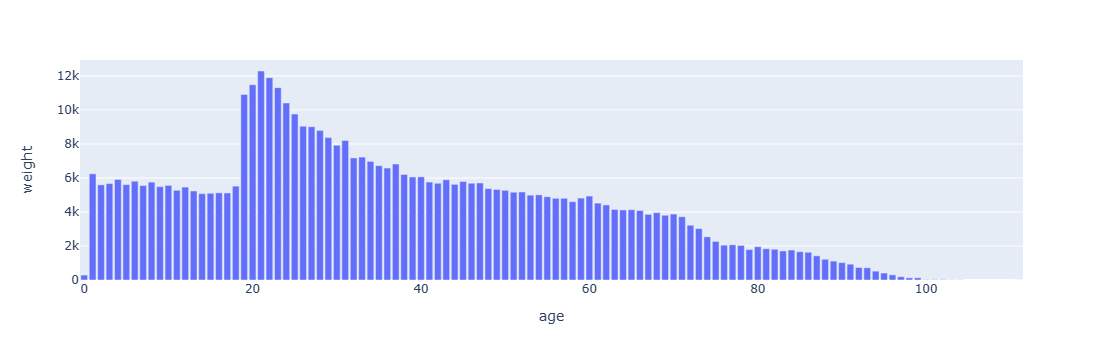

In [284]:
# Age distribution of the study area
df_age_study_area = df_census_filtered.groupby("age")["weight"].sum().reset_index()
px.bar(df_age_study_area, x = "age", y = "weight")

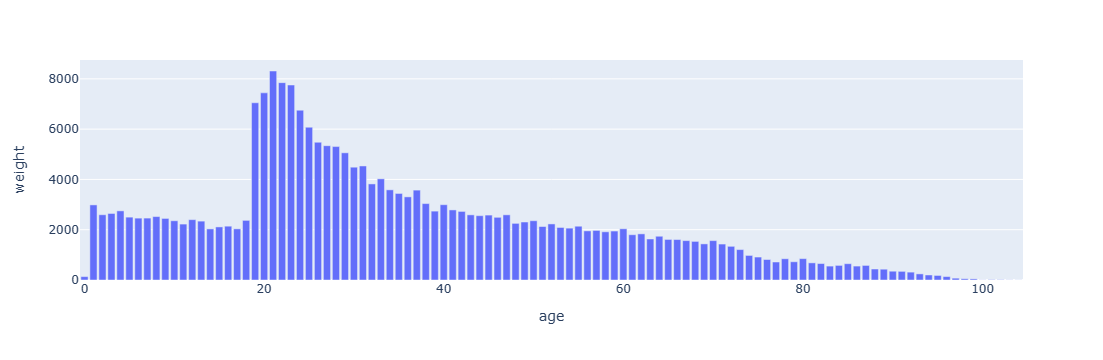

In [280]:
# Age distribution of the center municipality

df_census_filtered_center = df_census_filtered[df_census_filtered["municipality_id"] == '59350']

df_age_study_area = df_census_filtered_center.groupby("age")["weight"].sum().reset_index()
px.bar(df_age_study_area, x = "age", y = "weight")

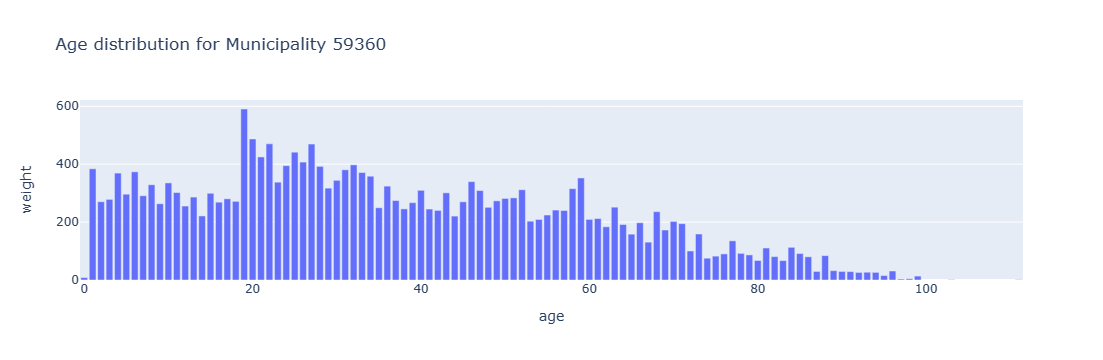

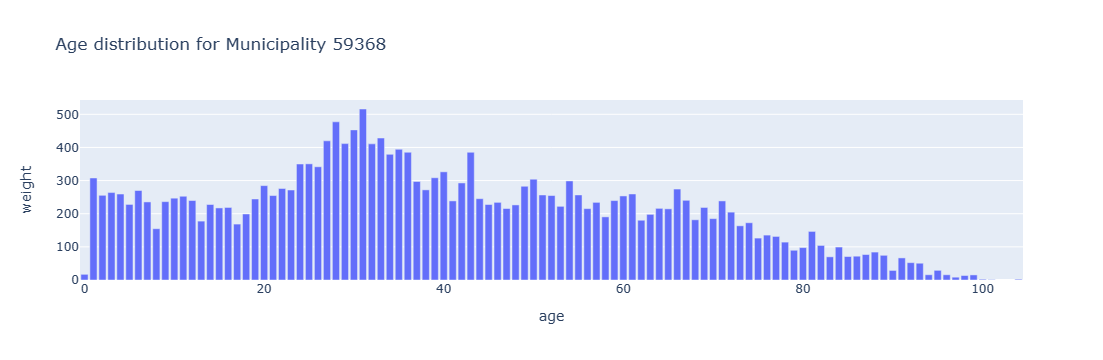

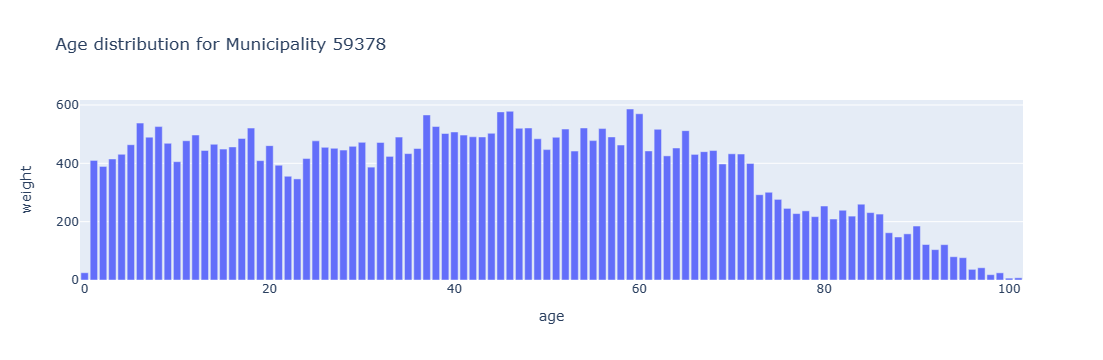

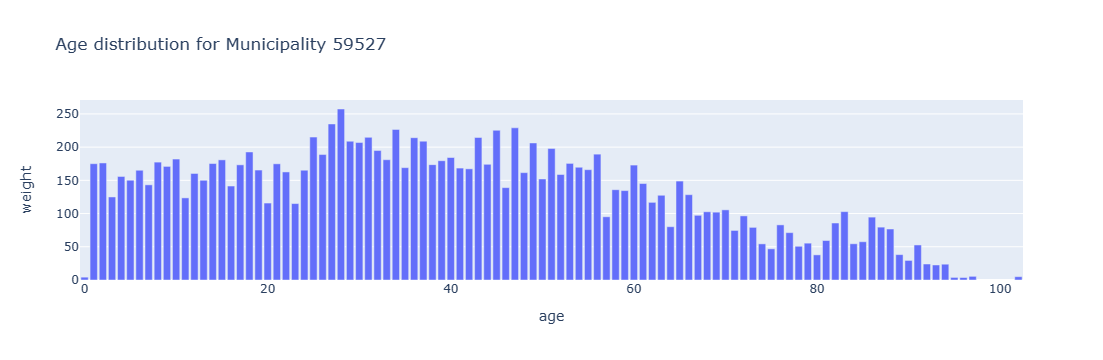

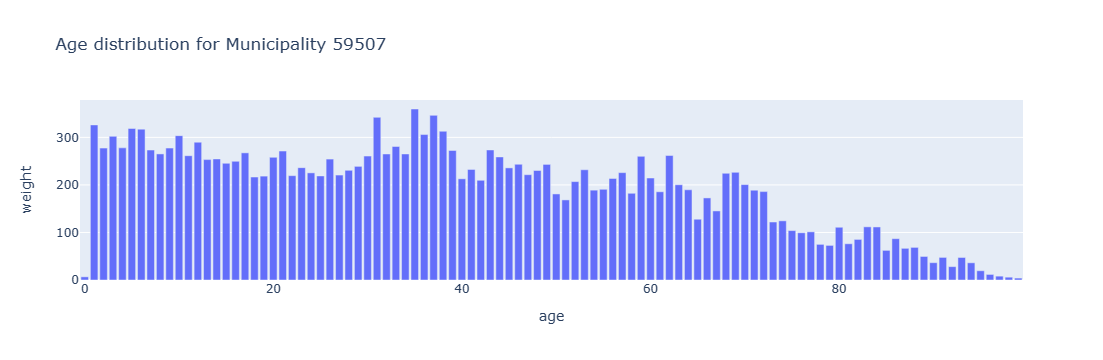

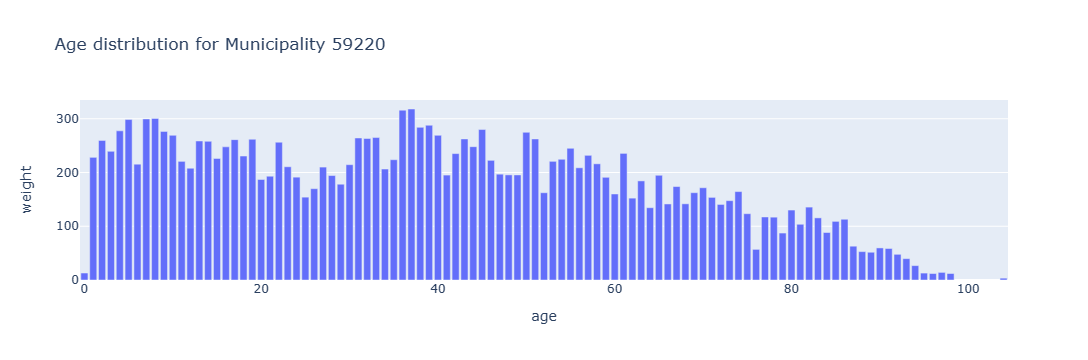

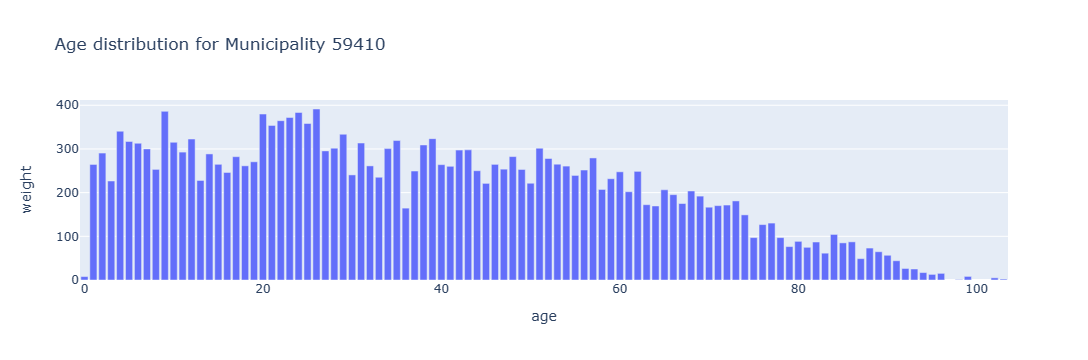

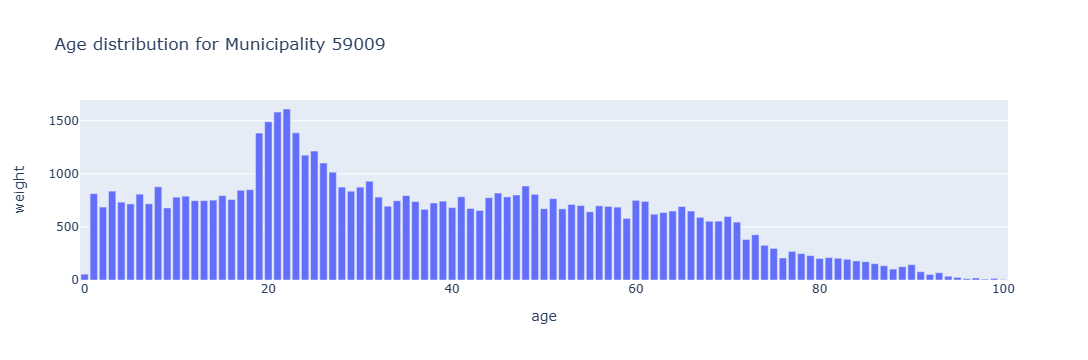

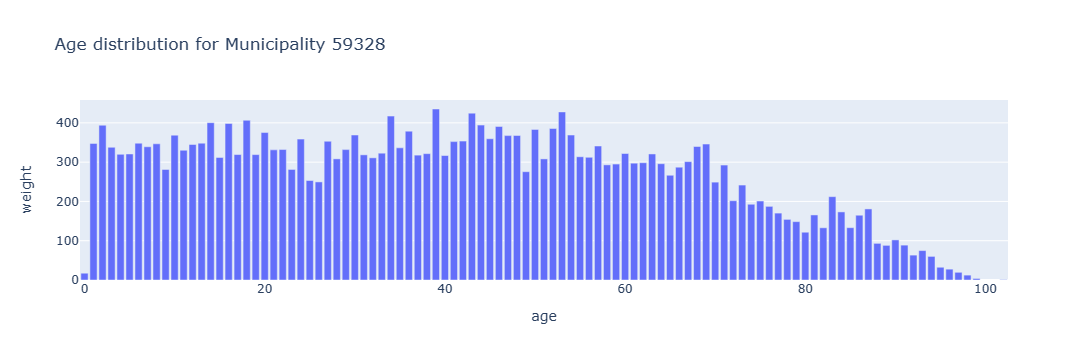

In [293]:
# Age distribution of the neighbouring municipalities
for municipality_id in chosen_muni[1:]:
    df_census_filtered_muni = df_census_filtered[df_census_filtered["municipality_id"] == municipality_id]
    
    df_age_study_area = df_census_filtered_muni.groupby("age")["weight"].sum().reset_index()
    
    fig = px.bar(df_age_study_area, x="age", y="weight", title=f"Age distribution for Municipality {municipality_id}")
    fig.show()


We can notice that the center municipality has way more people aged 20-25 from the graph. This can be explained by the high number of universities in Lille (therefore the high number of students in the area).
Compared to the neighbouring municipalities, the age distribution differs. 
For example, in Lambersart (59328), we can see an equal number of people aged between 1 and 10 years old as the other ranges. 
We can also note that the number of people decreases when the age increases in all the municipalities.

The overall trend of the age distribution for the whole aggregated study area is influenced by the center area which is the most populated. We can notice the same increase of the population aged between 20-25 years old.

### Social-professional categories distribution

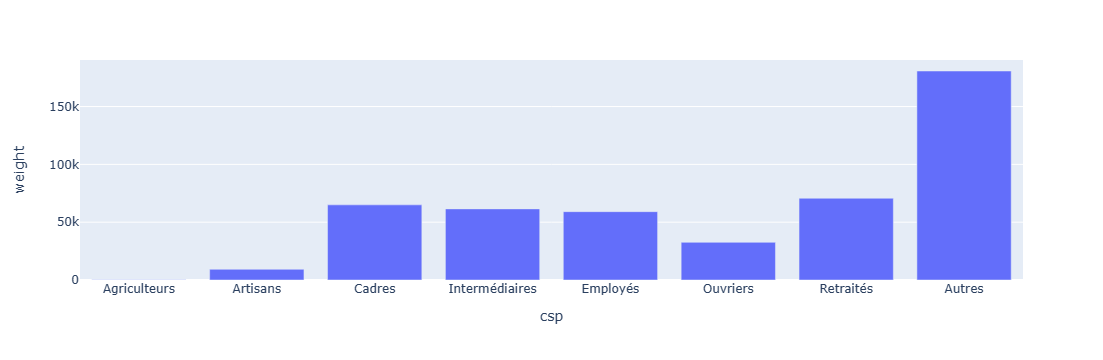

In [285]:
# Socio-professional distribution of the study area
df_csp = df_census_filtered.groupby("csp")["weight"].sum().reset_index()
df_csp = df_csp.replace({
    1: "Agriculteurs",
    2: "Artisans",
    3: "Cadres",
    4: "Intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Autres"
})

px.bar(df_csp, x = "csp", y = "weight")

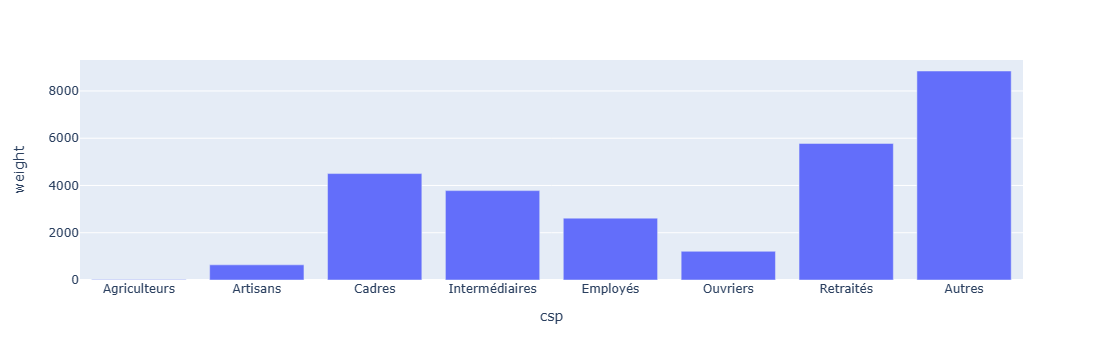

In [289]:
# Socio-professional distribution of the center municipality

df_csp = df_census_filtered_center.groupby("csp")["weight"].sum().reset_index()
df_csp = df_csp.replace({
    1: "Agriculteurs",
    2: "Artisans",
    3: "Cadres",
    4: "Intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Autres"
})

px.bar(df_csp, x = "csp", y = "weight")

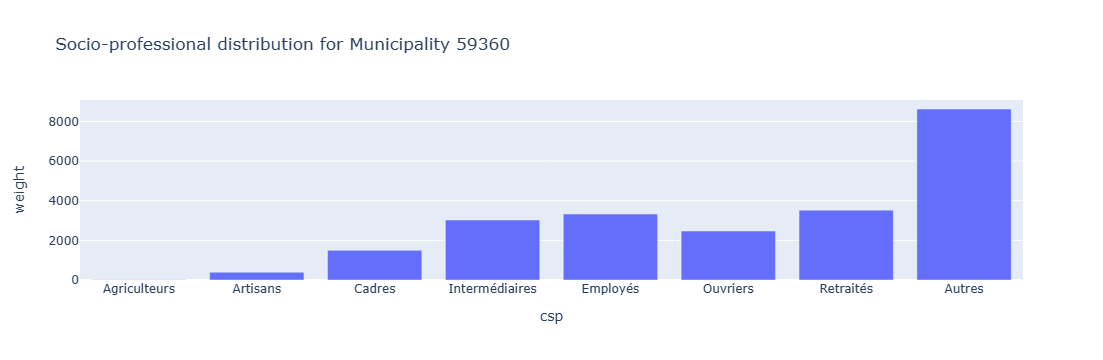

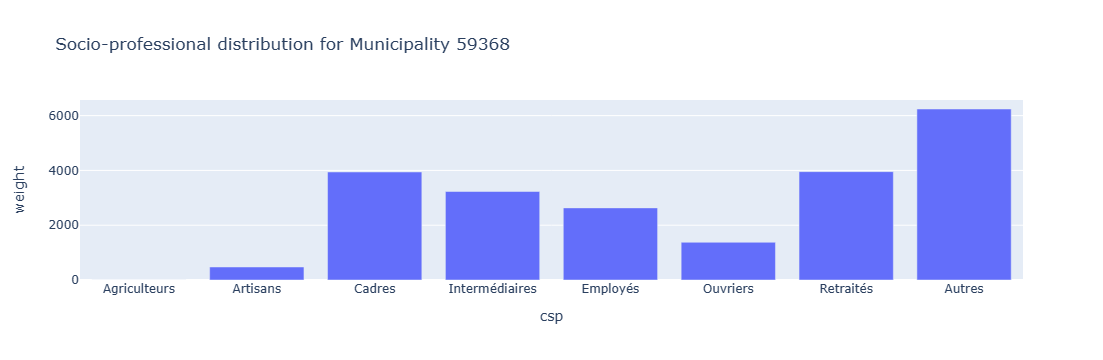

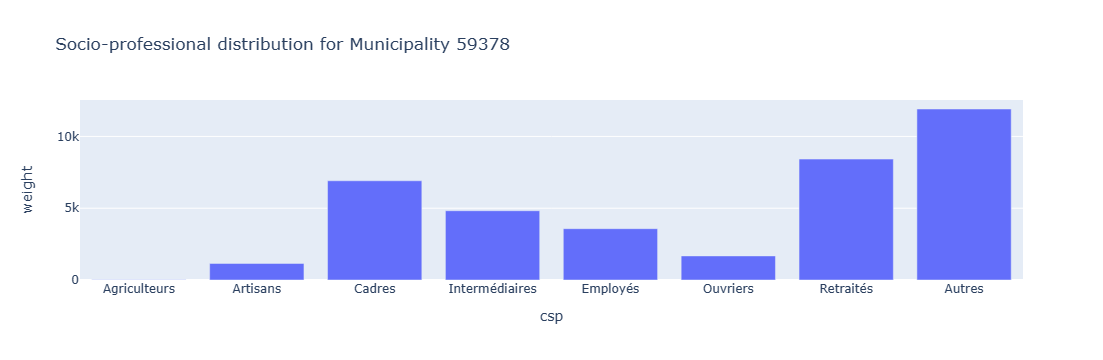

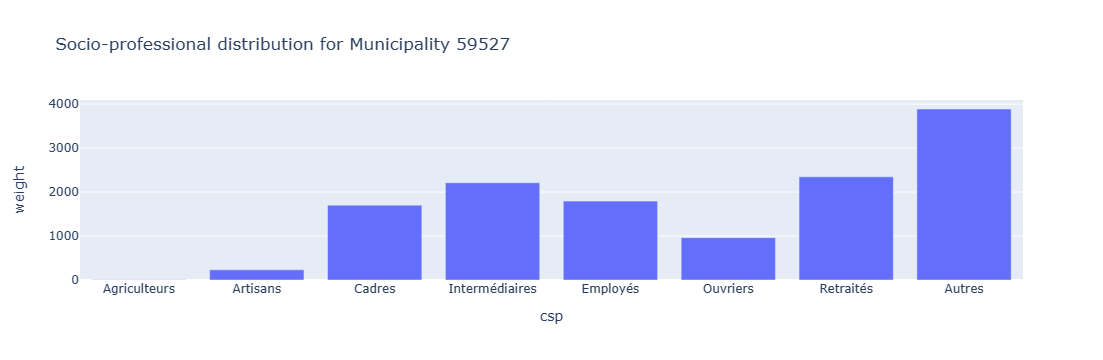

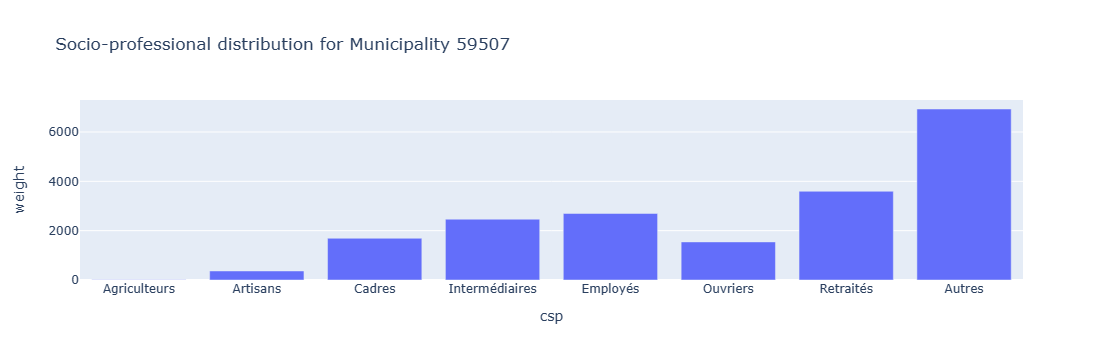

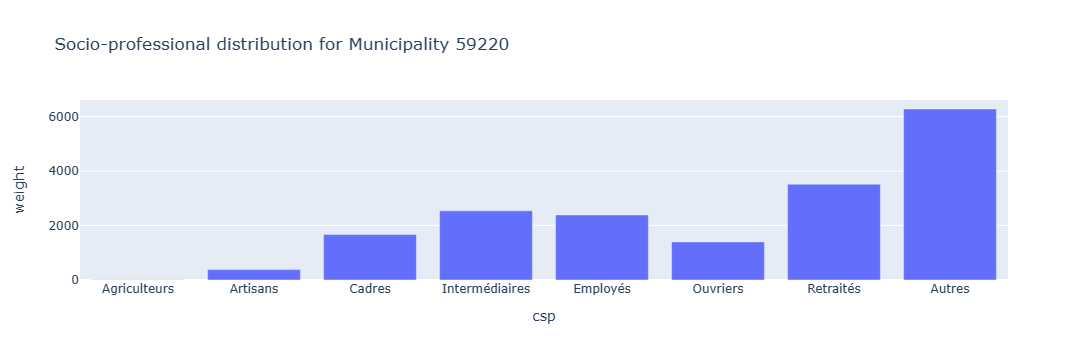

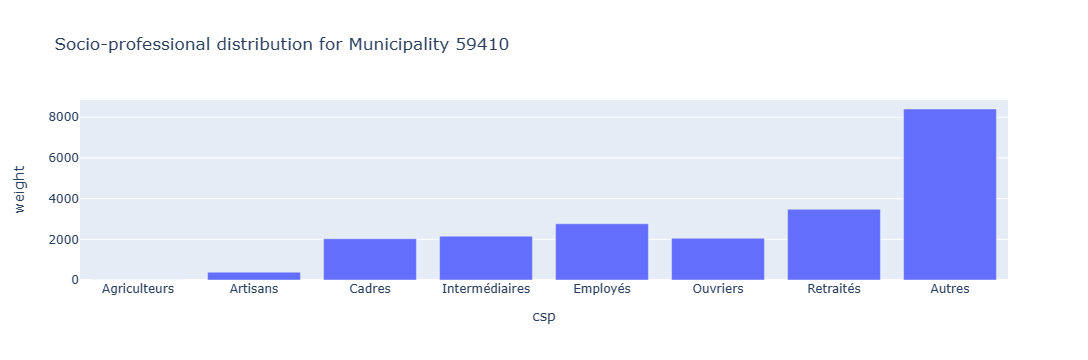

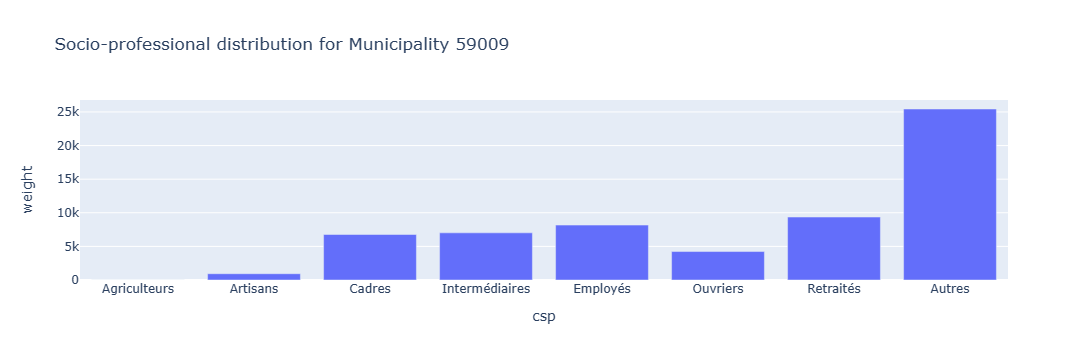

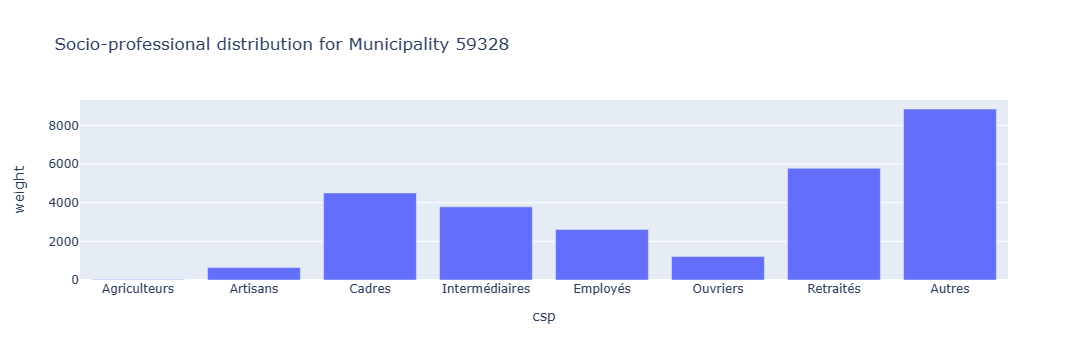

In [294]:
# Socio-professional distribution of the neighbouring municipalities

for municipality_id in chosen_muni[1:]:
    df_census_filtered_muni = df_census_filtered[df_census_filtered["municipality_id"] == municipality_id]
    df_csp = df_census_filtered_muni.groupby("csp")["weight"].sum().reset_index()
    df_csp = df_csp.replace({
        1: "Agriculteurs",
        2: "Artisans",
        3: "Cadres",
        4: "Intermédiaires",
        5: "Employés",
        6: "Ouvriers",
        7: "Retraités",
        8: "Autres"
    })

    fig = px.bar(df_csp, x="csp", y="weight", title=f"Socio-professional distribution for Municipality {municipality_id}")
    fig.show()

We can notice that the socio-professional distribition of the study area reflects the distribution of each municipality.
In all municipalities, we can find:
- 0 "agriculteurs"
- a small number of "Artisans"
- a high number of "Autres"
- a small number of "Ouvriers"

The difference between the municipalities is that some have equal number of "Cadres" and "Retraites", others have more "Cadres" et others more "Retraites".

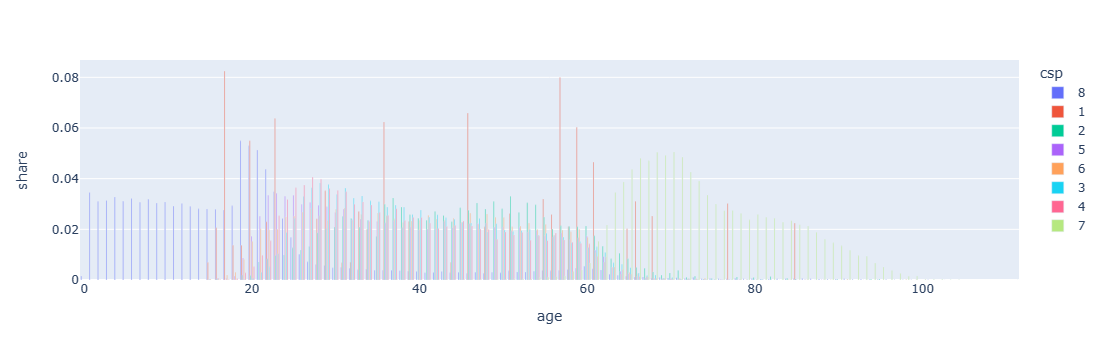

In [288]:
# Age and socio-professional distributions
df_age_csp = df_census_filtered.groupby(["age", "csp"])["weight"].sum().reset_index()
df_total = df_census_filtered.groupby("csp")["weight"].sum().reset_index().rename(columns = { "weight": "total" })

df_age_csp = pd.merge(df_age_csp, df_total, on = "csp")
df_age_csp["share"] = df_age_csp["weight"] / df_age_csp["total"]

df_age_csp["csp"] = df_age_csp["csp"].astype(str)

px.bar(df_age_csp, x = "age", y = "share", color = "csp", barmode = "group")

# Import employment data

In [295]:
df_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", nrows = 20)
df_population

,IRIS,COM,TYP_IRIS,MODIF_IRIS,LAB_IRIS,P19_POP,P19_POP0002,P19_POP0305,P19_POP0610,P19_POP1117,...,C19_F15P_CS4,C19_F15P_CS5,C19_F15P_CS6,C19_F15P_CS7,C19_F15P_CS8,P19_POP_FR,P19_POP_ETR,P19_POP_IMM,P19_PMEN,P19_PHORMEN
0,10010000,1001,Z,0,5,779.000000,28.717996,17.704186,56.118237,88.707423,...,51.660136,85.506573,30.706106,74.014043,15.282114,770.764925,8.235075,20.489890,779.000000,0.000000
1,10020000,1002,Z,0,5,256.000000,14.822643,10.649265,14.954810,25.657176,...,21.129095,26.532030,0.000000,20.804745,0.000000,253.880636,2.119364,3.159602,256.000000,0.000000
2,10040101,1004,H,0,1,1866.820612,81.762602,47.104967,100.705691,139.733038,...,97.002069,230.709482,57.381411,173.435664,188.940291,1581.546546,285.274066,254.016701,1503.829647,362.990965
3,10040102,1004,H,0,1,3597.838556,168.897927,119.186603,198.365404,259.072890,...,227.534831,393.985009,153.027649,395.418257,324.027792,3147.417422,450.421134,561.857429,3597.838556,0.000000
4,10040201,1004,H,0,1,4134.477890,167.871616,174.765320,272.922347,394.708508,...,251.065974,374.705891,192.484961,512.421938,366.036586,3774.171377,360.306514,418.569299,4046.480081,87.997810
5,10040202,1004,H,0,1,4534.862942,149.032630,182.900634,328.935646,431.321937,...,373.780995,389.637137,139.310148,483.551623,345.786401,4358.626449,176.236493,344.727641,4476.864386,57.998556
6,10050000,1005,Z,0,5,1751.000000,61.904040,67.799663,122.825477,154.268799,...,112.999439,245.650954,19.652076,181.781706,78.608305,1718.574074,32.425926,71.730079,1751.000000,0.000000
7,10060000,1006,Z,0,5,112.000000,3.054545,1.018182,3.054545,8.145455,...,10.181818,10.181818,5.090909,15.272727,0.000000,104.872727,7.127273,8.145455,112.000000,0.000000
8,10070000,1007,Z,0,5,2800.000000,116.000000,112.000000,222.000000,281.000000,...,230.000000,315.000000,70.000000,220.000000,175.000000,2744.000000,56.000000,101.000000,2790.000000,10.000000
9,10080000,1008,Z,0,5,762.000000,21.095829,28.067781,48.114928,69.157812,...,70.322093,85.929791,25.334862,66.146506,25.267737,743.890882,18.109118,25.181515,762.000000,0.000000


In [296]:
pd.DataFrame({ "municipality_id": [], "population": [], "csp_1": [], "csp_2": [], "csp_3": [], "csp_...": [] })

,municipality_id,population,csp_1,csp_2,csp_3,csp_...


In [297]:
df_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", dtype = {
    "COM": "str"
}, usecols = ["COM", "P19_POP"] + ["C19_POP15P_CS{}".format(k) for k in range(1,9)])

for k in range(1, 9):
    df_population["csp_{}".format(k)] = df_population["C19_POP15P_CS{}".format(k)]
    
df_population = df_population[["COM", "P19_POP"] + ["csp_{}".format(k) for k in range(1,9)]]
df_population.columns = ["municipality_id", "population"] + ["csp_{}".format(k) for k in range(1,9)]
df_population = df_population.groupby("municipality_id").sum().reset_index()

<Axes: >

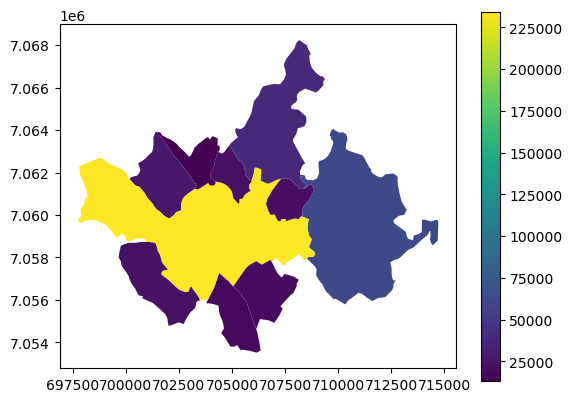

In [299]:
pd.merge(df_municipalities[df_municipalities["municipality_id"].isin(chosen_muni)], df_population).plot("population", legend = True)

# Import commuting data

In [44]:
columns = { "COMMUNE": str, "ARM": str, "DCLT": str, "IPONDI": float, "TRANS": int }
df_commutes = pd.read_csv("RP2019_MOBPRO_csv/FD_MOBPRO_2019.csv", dtype = columns, usecols = columns.keys(), sep = ";")

In [45]:
f = df_commutes["ARM"] != "ZZZZZ"
df_commutes.loc[f, "COMMUNE"] = df_commutes.loc[f, "ARM"]

In [46]:
pd.DataFrame({ "origin_id": [], "destination_id": [], "weight": [], "transport_mode": [] })

,origin_id,destination_id,weight,transport_mode


In [47]:
df_commutes = df_commutes.rename(columns = {
    "COMMUNE": "origin_id", "DCLT": "destination_id", "IPONDI": "weight", "TRANS": "transport_mode"
})[["origin_id", "destination_id", "weight", "transport_mode"]]

C:\Users\Dora-\AppData\Local\Temp\ipykernel_12376\4075215800.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_commutes["origin_id"] == "59350"]


<Axes: >

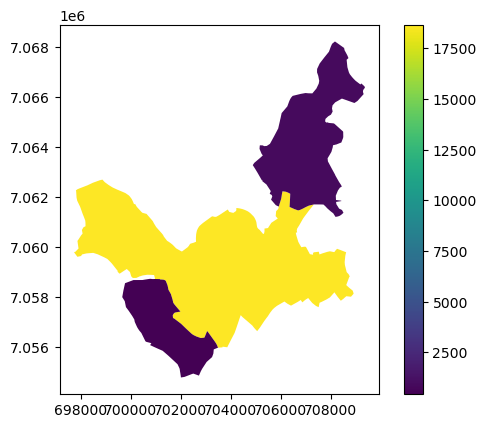

In [48]:
df = df_commutes[df_commutes["transport_mode"] == 6]
df = df[df_commutes["origin_id"] == "59350"]
df = df.groupby("destination_id")["weight"].sum().reset_index()
df = df.rename(columns = { "destination_id": "municipality_id" })

pd.merge(df_municipalities[df_municipalities["municipality_id"].isin(chosen_muni)], df).plot("weight", legend = True)

In [42]:
df_commutes = df_commutes.groupby(["origin_id", "destination_id"])["weight"].sum().reset_index()

# 2.1) Trip production

In [171]:
# Filter the 3 needed datasets to just select the chosen municipalities
df_population = df_population[df_population['municipality_id'].isin(chosen_muni)]
df_municipalities = df_municipalities[df_municipalities['municipality_id'].isin(chosen_muni)]

df_commutes = df_commutes[
    df_commutes["origin_id"].isin(chosen_muni) &
    df_commutes["destination_id"].isin(chosen_muni)
]

In [172]:
df_commutes

,origin_id,destination_id,weight,transport_mode
3548442,59009,59009,3.144501,1
3548443,59009,59009,2.657641,5
3548444,59009,59009,2.657641,5
3548445,59009,59009,2.657641,5
3548446,59009,59009,2.657641,5
...,...,...,...,...
3780265,59527,59527,0.952974,3
3780266,59527,59527,0.952974,5
3780267,59527,59527,0.952974,3
3780268,59527,59527,0.952974,2


In [173]:
# synchronise the index
municipalities = df_municipalities["municipality_id"].unique()
df_population = df_population.set_index("municipality_id").reindex(municipalities)

In [174]:
df_population

,population,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8
municipality_id,,,,,,,,,
59009,61957.0,14.723102,931.670764,6767.887564,7017.403337,8171.222999,4234.093627,9365.421703,13935.681364
59220,18191.0,9.612021,381.404119,1669.719537,2540.986496,2384.217722,1399.053933,3519.234120,2445.584514
59328,27400.0,21.281429,642.013482,4503.704635,3782.308880,2618.378839,1211.602219,5778.648844,3702.544938
59350,234475.0,56.812973,4290.066757,34250.828897,30237.275354,29119.135630,15631.110910,26706.108790,57293.092217
59360,22866.0,12.870265,390.782218,1495.781185,3027.366156,3326.733870,2469.502994,3524.704841,4085.137862
59368,21856.0,0.989125,475.003117,3942.894945,3230.024019,2632.208012,1375.303937,3955.948554,2681.418692
59378,38486.0,14.928122,1152.657836,6911.353064,4824.551035,3574.552989,1678.152957,8422.179480,5035.709670
59410,21277.0,3.760824,381.980026,2029.429613,2155.711901,2757.877317,2051.841143,3478.561000,4024.749774
59507,19294.0,5.823843,365.831977,1691.469311,2465.515270,2696.569309,1543.519009,3596.383991,2702.852299


In [175]:
df_origins = df_commutes.groupby("origin_id")["weight"].sum().reset_index()
df_origins = df_origins.set_index("origin_id").reindex(municipalities)

In [176]:
df_origins

,weight
origin_id,
59009,15055.292226
59220,4825.021980
59328,7929.498312
59350,66418.040870
59360,6003.055039
59368,6838.874536
59378,10642.800806
59410,5318.751379
59507,5039.037820


In [177]:
# Crate the model
## Array of the model parameters
beta = np.array([27.244, 0.319, 0.994, 0.863, 0.990, 0.780, 0.708, 0.120, -0.073])

## Model
def calculate_Oi(row):
    # Extract population data for each CSP
    population_sizes = row[['csp_1', 'csp_2', 'csp_3', 'csp_4', 'csp_5', 'csp_6', 'csp_7', 'csp_8']]

    # Calculate the sum of products of growth factors and population sizes
    sum_products = np.sum(beta[1:] * population_sizes)
    
    # Calculate Oi using the provided formula
    Oi = max(beta[0] + sum_products, 0)
    
    return Oi

In [192]:
## Apply the model in the study area
O_generated = df_population.apply(calculate_Oi, axis=1)

In [193]:
O = df_origins["weight"].values

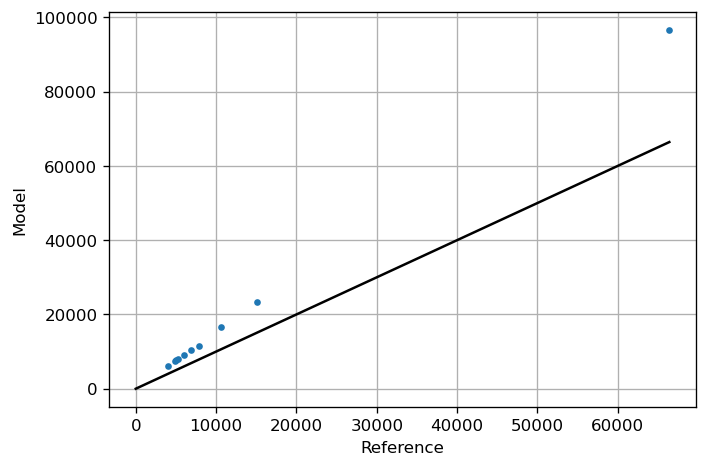

In [194]:
plt.figure(dpi = 120, figsize = (6, 4))

plt.plot(O, O_generated, ".")
plt.plot([0, np.max(O)], [0, np.max(O)], "k")

plt.grid()
plt.xlabel("Reference")
plt.ylabel("Model")

plt.tight_layout()

In [186]:
# Calculate the total generated trips in the study area
total_trips = O_generated.sum()
print("Total number of trips generated:", total_trips)

Total number of trips generated: 196949.73796670348


In [199]:
# Generated trips by minicipality
O_generated_reset = O_generated.reset_index()
O_generated_reset.rename(columns={'index': 'municipality_id', 0: 'commuters'}, inplace=True)

O_generated_reset

,municipality_id,commuters
0,59009,23223.775773
1,59220,7459.970953
2,59328,11626.679014
3,59350,96605.151272
4,59360,9175.748852
5,59368,10405.962444
6,59378,16537.889536
7,59410,8021.152810
8,59507,7723.730304
9,59527,6169.677009


In [200]:
# In order to  plot how many trips have been generated for each municipality in the study area, using a map from the iris database. 

df_iris_population = pd.read_csv("base-ic-evol-struct-pop-2019.CSV", sep = ";", dtype = {
    "IRIS": "str"
}, usecols = ["IRIS"] + ["C19_POP15P_CS{}".format(k) for k in range(1,9)])

for k in range(1, 9):
    df_iris_population["csp_{}".format(k)] = df_iris_population["C19_POP15P_CS{}".format(k)]
    
df_iris_population = df_iris_population[["IRIS"] + ["csp_{}".format(k) for k in range(1,9)]]
df_iris_population.columns = ["iris_id"] + ["csp_{}".format(k) for k in range(1,9)]

df_iris_population = df_iris_population.groupby("iris_id").sum().reset_index()

df_matched = pd.merge(df_iris[
    df_iris["iris_id"].str[:5].isin(chosen_muni)
], df_iris_population, on = "iris_id")

df_matched.set_index("municipality_id", inplace=True)

df_merged = df_matched.merge(O_generated_reset, on="municipality_id", how="right")

df_merged

,municipality_id,iris_id,geometry,csp_1,csp_2,csp_3,csp_4,csp_5,csp_6,csp_7,csp_8,commuters
0,59009,590090207,"POLYGON ((709245.200 7059909.100, 709256.700 7...",0.000000,18.898734,182.012957,229.192772,124.204097,54.291937,264.604392,175.851013,23223.775773
1,59009,590090203,"POLYGON ((709084.200 7061650.800, 709087.200 7...",3.136093,40.935929,433.241451,414.823762,355.759619,107.909933,450.366805,384.504627,23223.775773
2,59009,590090301,"POLYGON ((711062.200 7060500.300, 711066.600 7...",0.000000,36.263370,381.544252,376.641060,322.182940,188.041451,504.815032,456.060866,23223.775773
3,59009,590090304,"POLYGON ((710511.000 7060186.100, 710513.000 7...",0.000000,27.356368,248.395615,201.864419,258.781458,114.756341,270.240594,282.992863,23223.775773
4,59009,590090202,"POLYGON ((708905.400 7061082.700, 708913.400 7...",0.000000,0.000000,44.999768,129.999330,201.665627,9.999948,0.000000,69.999639,23223.775773
...,...,...,...,...,...,...,...,...,...,...,...,...
221,59527,595270106,"POLYGON ((703527.400 7063222.300, 703516.400 7...",0.000000,0.000000,0.000000,30.494997,39.640353,5.433295,20.850204,29.524935,6169.677009
222,59527,595270103,"POLYGON ((703547.800 7062805.200, 703547.300 7...",0.000000,51.339201,273.114894,321.656735,241.713208,141.398281,396.966111,276.623650,6169.677009
223,59527,595270101,"POLYGON ((701630.900 7063872.400, 701640.300 7...",0.000000,15.979972,269.154883,310.469104,220.687507,73.752000,477.455123,222.142007,6169.677009
224,59527,595270102,"POLYGON ((703547.800 7062805.200, 703549.000 7...",0.000000,21.942146,201.169379,255.697055,246.574206,183.256289,377.381176,245.405181,6169.677009


<Axes: >

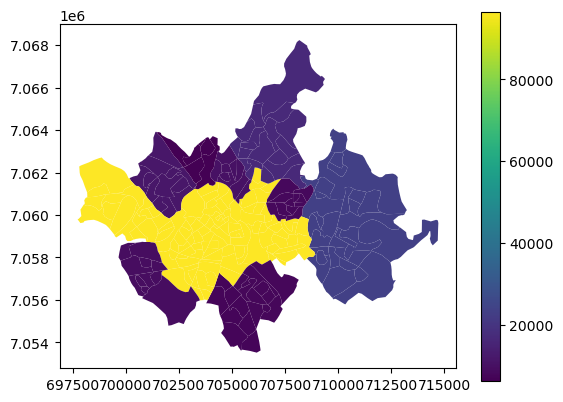

In [201]:
df_merged["commuters"] = df_merged["commuters"].astype(float)
df_merged.plot("commuters", legend = True)